# Data Frame Description

Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#dropping loanid column as it donot help in prediction of target
df.drop(['Loan_ID'],axis=1,inplace=True)

In [6]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Numerical Data:
    
1.ApplicantIncome       
2.CoapplicantIncome    
3.LoanAmount           
4.Loan_Amount_Term     
5.Credit_History  

Categorical Data:
    
1.Gender                
2.Married              
3.Dependents            
4.Education            
5.Self_Employed 
6.Property_Area 
7.Loan_Status           

# Checking null values in the dataframe

In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

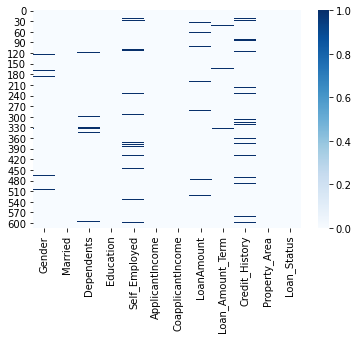

In [8]:
#data visualisation
sns.heatmap(df.isnull(),cmap='Blues')

In [9]:
#%age data missing
for i in df.columns:
    print('% data missing in',i,'is:',(df[i].isnull().sum()/df.shape[0])*100)

% data missing in Gender is: 2.1172638436482085
% data missing in Married is: 0.4885993485342019
% data missing in Dependents is: 2.44299674267101
% data missing in Education is: 0.0
% data missing in Self_Employed is: 5.211726384364821
% data missing in ApplicantIncome is: 0.0
% data missing in CoapplicantIncome is: 0.0
% data missing in LoanAmount is: 3.5830618892508146
% data missing in Loan_Amount_Term is: 2.2801302931596092
% data missing in Credit_History is: 8.143322475570033
% data missing in Property_Area is: 0.0
% data missing in Loan_Status is: 0.0


# Exploratory Data Analysis:

# Univariate Analysis(Numerical Data):

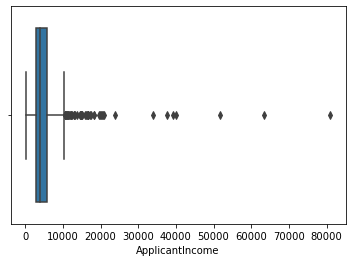

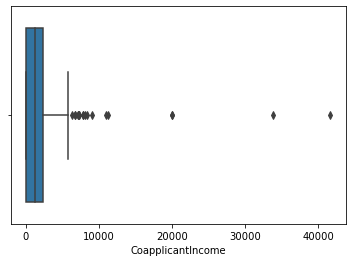

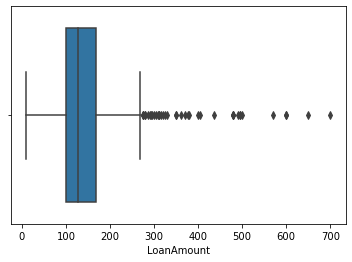

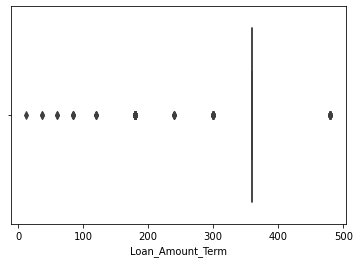

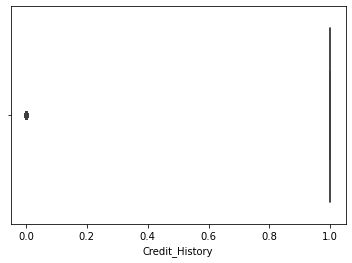

In [10]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.boxplot(x=i,data=df)
        plt.show()                               

Observation:
    
1.Maximum income of applicant is around 80000 and average income around 5000.

2.Maximum income of applicant is around 80000 and average income around 2000.

3.Maximum Loan amount is around 700 and average amount around 120.

4.Loan amount term is a discrete quantity and varies from 0 to 500.

# Univariate Analysis(Categorical Data):

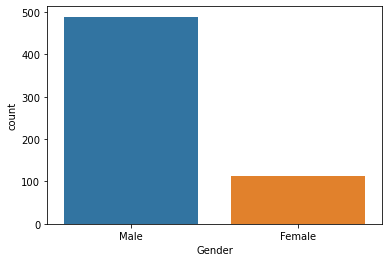

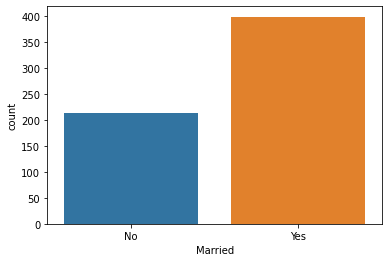

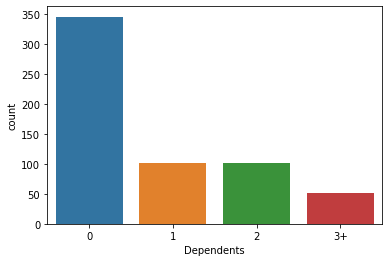

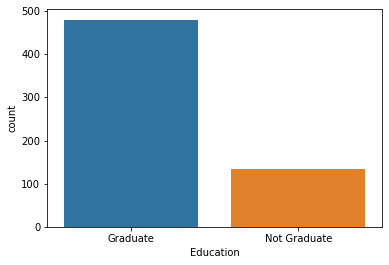

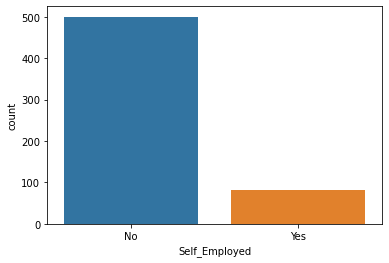

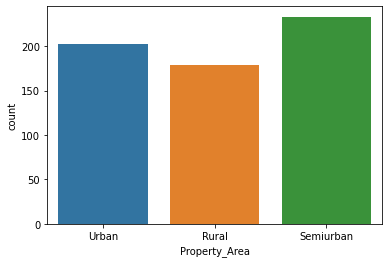

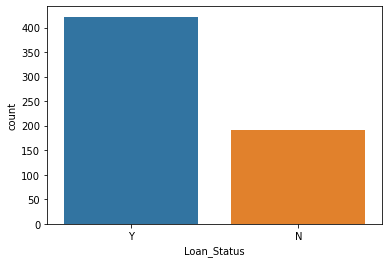

In [11]:
for i in df.columns:
    if (df[i].dtypes=='object'):
        sns.countplot(x=i,data=df)
        plt.show()                               

Observation:
    
1.Most of the applicants are male.

2.Most of the applicants are married.

3.Most of the applicants dont have any dependents.

4.Most of the applicants are graduate.

5.There are very few applicants who are self employed.

6.Most of the applicants belons to semi urban area followed by urban.

7.The dataset contains maximum candidated with approved loan status

# Bivariate Analysis:

In [12]:
cat=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in cat:
    print(pd.crosstab(df[i],df['Loan_Status']).apply(lambda x:round(x/x.sum()*100,1),axis=1))
    print('\n')
    print('\n')

Loan_Status     N     Y
Gender                 
Female       33.0  67.0
Male         30.7  69.3




Loan_Status     N     Y
Married                
No           37.1  62.9
Yes          28.4  71.6




Loan_Status     N     Y
Dependents             
0            31.0  69.0
1            35.3  64.7
2            24.8  75.2
3+           35.3  64.7




Loan_Status      N     Y
Education               
Graduate      29.2  70.8
Not Graduate  38.8  61.2




Loan_Status       N     Y
Self_Employed            
No             31.4  68.6
Yes            31.7  68.3




Loan_Status       N     Y
Property_Area            
Rural          38.5  61.5
Semiurban      23.2  76.8
Urban          34.2  65.8






# Converting Target data to Numerical Data for better EDA

In [13]:
df['Loan_Status']=df['Loan_Status'].replace('Y',1)
df['Loan_Status']=df['Loan_Status'].replace('N',0)

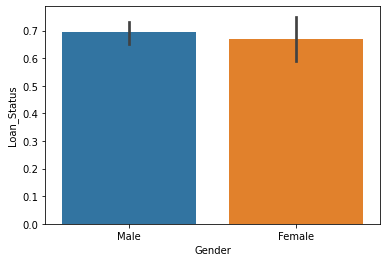

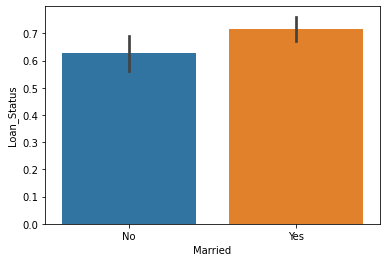

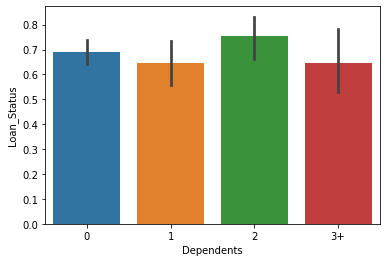

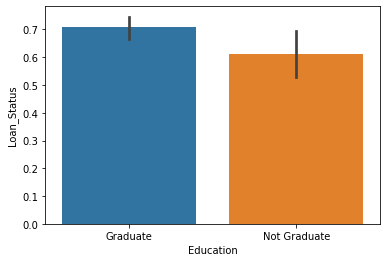

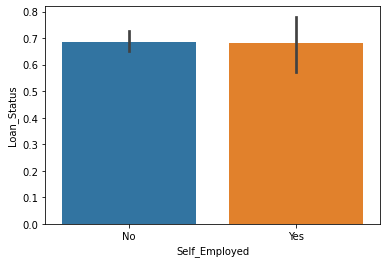

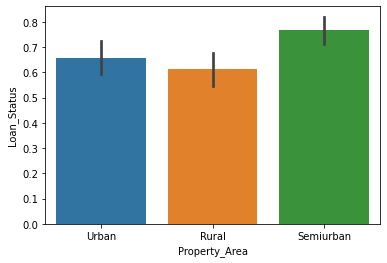

In [14]:
cat=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
num=['Loan_Status']
for i in cat:
    for j in num:
        sns.barplot(x=i,y=j,data=df)
        plt.show()

Observation:
    
1.Male and female have same possibilty of loan approval.

2.Married applicants have slightly higher possibilty of loan approval.

3.Self employed people have same possibily of loan approval than those who are not.

4.Applicants with 2 dependents have higher possibilty of loan approval.

5.Applicants who are graduate have higher possibilty of loan approval.

6.Applicants who are staying in semiurban area have higher possibilty of loan approval.


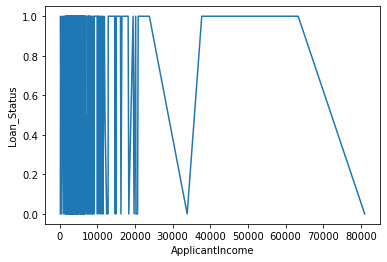

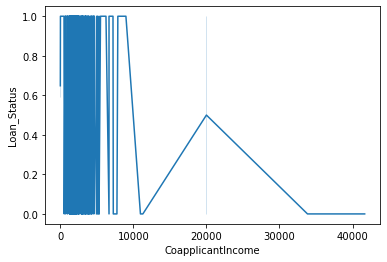

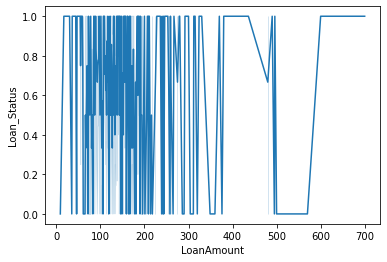

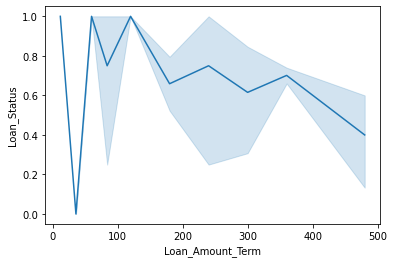

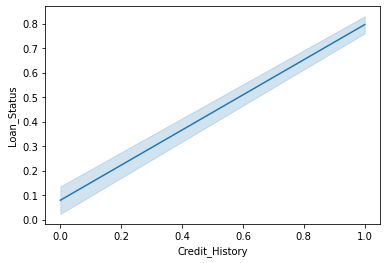

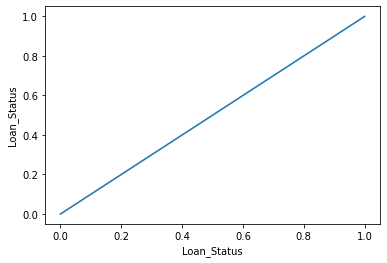

In [15]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.lineplot(x=i,y='Loan_Status',data=df)
        plt.show()

Observation:
    
1. With increase in loan amount term the possibility of loan approval decreases.

2. Applicants with higher credit score have high chances of loan approval.

# Data Set Description

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


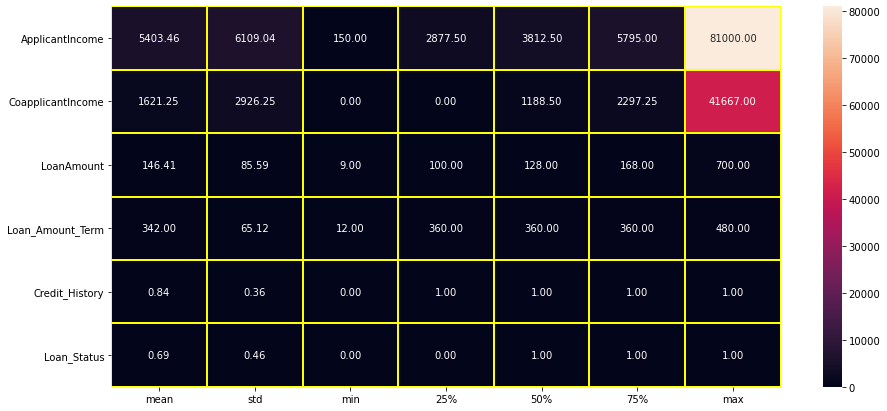

In [17]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Observation:
    
There is a huge difference between  the 75% percentile and max in "ApplicantIncome","CoapplicantIncome","LoanAmount" indicating heavy outliers might be present.

# Filling Missing Values:

In [18]:
#filling missing numerical value
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        df[i]=df[i].fillna(np.mean(df[i]))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [19]:
#filling missing categoical value
for i in df.columns:
    if (df[i].dtypes=='object'):
        df[i] = df[i].fillna(df[i].mode()[0])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [20]:
#replace the value of 3+ in dependents with 4 
df.loc[df["Dependents"] == "3+", "Dependents"] = 4

In [21]:
df["Dependents"]=df["Dependents"].astype('int64')

# Correlation

In [22]:
df.corr()['Loan_Status'].sort_values()

CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Dependents           0.002474
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:>

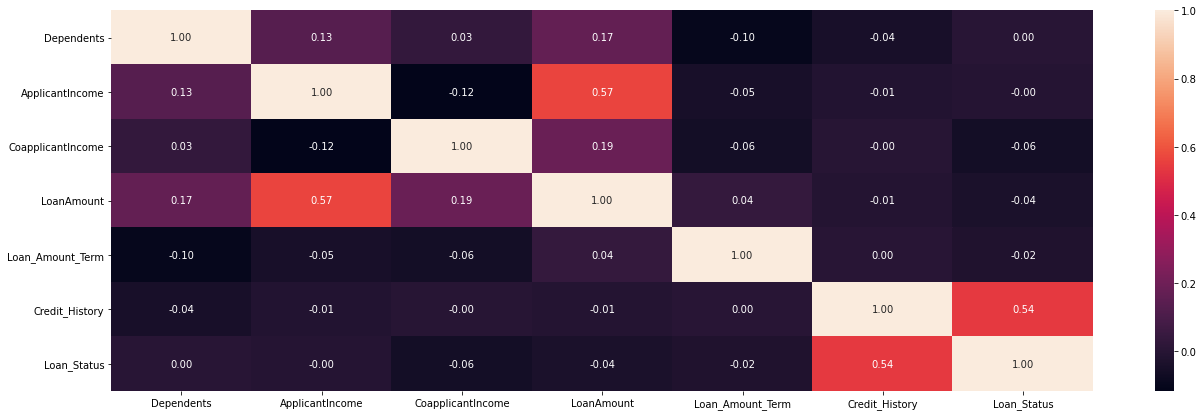

In [23]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='yellow')

Observations:

Loan_Status is highly correlated with credit history and least with Coapplicant Income

# Checking Skewness

In [24]:
df.skew()

Dependents           1.456965
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

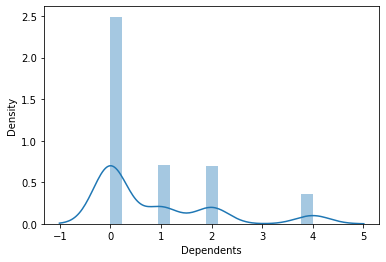

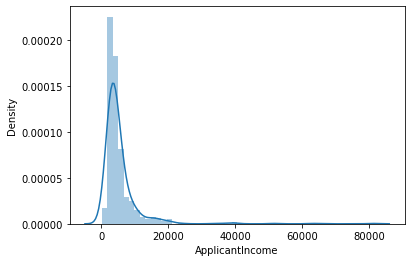

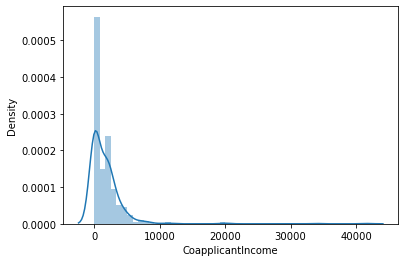

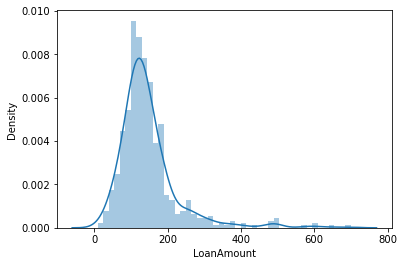

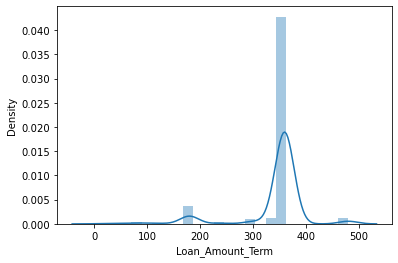

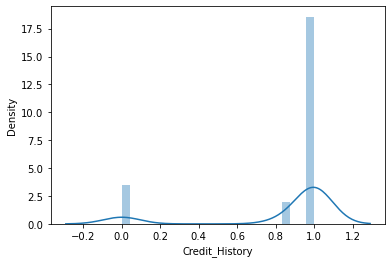

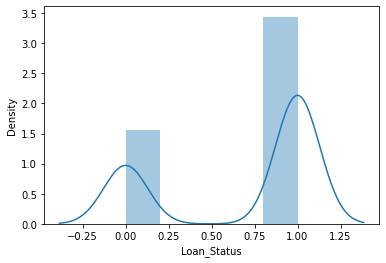

In [25]:
for i in df.columns:
    if (df[i].dtypes=='float')|(df[i].dtypes=='int64'):
        sns.distplot(df[i])
        plt.show()

Observation:
    
Left skewed:Loan_Amount_Term,Credit_History,Loan_Status  
    
Right skewed:Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount           

# Outliers Checking:

Dependents              AxesSubplot(0.125,0.657941;0.168478x0.222059)
ApplicantIncome      AxesSubplot(0.327174,0.657941;0.168478x0.222059)
CoapplicantIncome    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
LoanAmount           AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Loan_Amount_Term        AxesSubplot(0.125,0.391471;0.168478x0.222059)
Credit_History       AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Loan_Status          AxesSubplot(0.529348,0.391471;0.168478x0.222059)
dtype: object

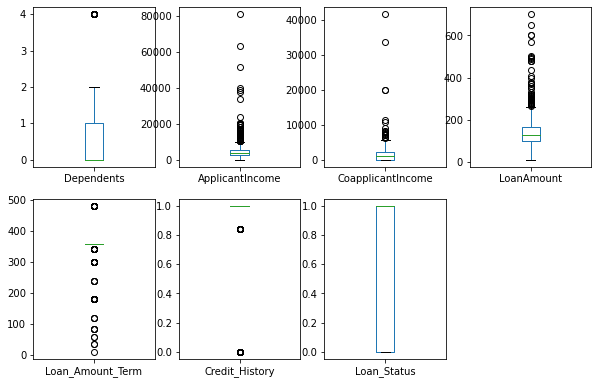

In [26]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

Observation:
    
ApplicantIncome,CoapplicantIncome,LoanAmount are the features(continuous) with outliers present.

# Checking if the target is balanced or not

In [27]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Target data is imbalanced and needs to be balanced

# Data Preprocessing

In [28]:
#removing unnecessary column Education
df.drop(['Education'],axis=1,inplace=True)

# REMOVING OUTLIERS:

In [29]:
#using quantile method
out=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in out:
    ub=df[i].quantile(0.99)
    lb=df[i].quantile(0.01)
    print(i)
    print('upper bound:',ub)
    print('lower bound:',lb)
    print('\n')

ApplicantIncome
upper bound: 32540.410000000047
lower bound: 1025.0


CoapplicantIncome
upper bound: 8895.890000000003
lower bound: 0.0


LoanAmount
upper bound: 495.87
lower bound: 30.65




In [30]:
df_new=df[(df['ApplicantIncome']<=32540.410)&(df['ApplicantIncome']>=1025.0)]
df_new=df[(df['CoapplicantIncome']<=8895.890)&(df['CoapplicantIncome']>=0.0)]
df_new=df[(df['LoanAmount']<=495.87)&(df['LoanAmount']>=30.65)]

In [31]:
df.shape[0]

614

In [32]:
df_new.shape[0]

600

In [33]:
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
data_loss

2.2801302931596092

Since only 2% data is lost due to ouliers removal we can consider to remove outliers

In [34]:
df=df_new

# Converting Categorical Data to Numerical

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

# Skewness Treatment:

In [36]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [37]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.46852129, -1.36777681, -0.81879456, ...,  0.17964994,
         0.51654822,  1.1992707 ],
       [ 0.46852129,  0.73111343,  0.8429482 , ...,  0.17964994,
         0.51654822, -1.33964616],
       [ 0.46852129,  0.73111343, -0.81879456, ...,  0.17964994,
         0.51654822,  1.1992707 ],
       ...,
       [ 0.46852129,  0.73111343,  0.8429482 , ...,  0.17964994,
         0.51654822,  1.1992707 ],
       [ 0.46852129,  0.73111343,  1.2949569 , ...,  0.17964994,
         0.51654822,  1.1992707 ],
       [-2.13437475, -1.36777681, -0.81879456, ...,  0.17964994,
        -2.2352112 ,  0.02026093]])

In [38]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.46852129, -1.36777681, -0.81879456, ...,  0.17964994,
         0.51654822,  1.1992707 ],
       [ 0.46852129,  0.73111343,  0.8429482 , ...,  0.17964994,
         0.51654822, -1.33964616],
       [ 0.46852129,  0.73111343, -0.81879456, ...,  0.17964994,
         0.51654822,  1.1992707 ],
       ...,
       [ 0.46852129,  0.73111343,  0.8429482 , ...,  0.17964994,
         0.51654822,  1.1992707 ],
       [ 0.46852129,  0.73111343,  1.2949569 , ...,  0.17964994,
         0.51654822,  1.1992707 ],
       [-2.13437475, -1.36777681, -0.81879456, ...,  0.17964994,
        -2.2352112 ,  0.02026093]])

# Balancing the dataset

In [39]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [40]:
y.value_counts()

0    411
1    411
Name: Loan_Status, dtype: int64

# Model Building:

In [41]:
# Since our outcome has only two variable we will use binary classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))
        print('\n')

At random state 110 The model performs very well
Training Accuracy Score is: 71.5
Testing Accuracy Score is: 71.5


At random state 156 The model performs very well
Training Accuracy Score is: 72.1
Testing Accuracy Score is: 72.1


At random state 172 The model performs very well
Training Accuracy Score is: 71.5
Testing Accuracy Score is: 71.5


At random state 212 The model performs very well
Training Accuracy Score is: 72.1
Testing Accuracy Score is: 72.1


At random state 251 The model performs very well
Training Accuracy Score is: 70.9
Testing Accuracy Score is: 70.9


At random state 257 The model performs very well
Training Accuracy Score is: 72.1
Testing Accuracy Score is: 72.1


At random state 378 The model performs very well
Training Accuracy Score is: 70.9
Testing Accuracy Score is: 70.9


At random state 440 The model performs very well
Training Accuracy Score is: 70.3
Testing Accuracy Score is: 70.3


At random state 453 The model performs very well
Training Accuracy Score

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression Model

In [65]:
#selecting random state=39
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=156,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))

Training Accuracy Score is: 72.1
Testing Accuracy Score is: 72.1


# CROSS VALIDATION OF THE MODEL

In [66]:
from sklearn.model_selection import cross_val_score
for k in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(y_train,pred_train))
    print('testing score :',accuracy_score(y_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.7141119221411192
training score : 0.7214611872146118
testing score : 0.7212121212121212


At crossfold= 3 the cv score is 0.7141119221411193
training score : 0.7214611872146118
testing score : 0.7212121212121212


At crossfold= 4 the cv score is 0.7116741652853422
training score : 0.7214611872146118
testing score : 0.7212121212121212


At crossfold= 5 the cv score is 0.7153141167775313
training score : 0.7214611872146118
testing score : 0.7212121212121212


At crossfold= 6 the cv score is 0.7068126520681265
training score : 0.7214611872146118
testing score : 0.7212121212121212


At crossfold= 7 the cv score is 0.7080151486931149
training score : 0.7214611872146118
testing score : 0.7212121212121212


At crossfold= 8 the cv score is 0.7055492099752523
training score : 0.7214611872146118
testing score : 0.7212121212121212


At crossfold= 9 the cv score is 0.7019164410468758
training score : 0.7214611872146118
testing score : 0.7212121212121212


At cross

In [67]:
#selecting cv=5 as it is very close to testing score
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for i in model:
    i.fit(x_train,y_train)
    ipred=i.predict(x_test)
    i.score(x_train,y_train)
    print(i)
    print('accuracy score:',accuracy_score(y_test,ipred))
    cv_score=cross_val_score(i,x,y,cv=5)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print(confusion_matrix(y_test,ipred))
    print(classification_report(y_test,ipred))
    print('\n')

DecisionTreeClassifier()
accuracy score: 0.793939393939394
the cv score is 0.7641241685144124
[[59 22]
 [12 72]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        81
           1       0.77      0.86      0.81        84

    accuracy                           0.79       165
   macro avg       0.80      0.79      0.79       165
weighted avg       0.80      0.79      0.79       165



KNeighborsClassifier()
accuracy score: 0.7393939393939394
the cv score is 0.7299334811529933
[[56 25]
 [18 66]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        81
           1       0.73      0.79      0.75        84

    accuracy                           0.74       165
   macro avg       0.74      0.74      0.74       165
weighted avg       0.74      0.74      0.74       165



SVC()
accuracy score: 0.7272727272727273
the cv score is 0.7335624538063562
[[44 37]
 [ 8 76]]
              precisio

# Ensemble Techniques

# Ramdom Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.8363636363636363
the cv score is 0.8347376201034737
[[59 22]
 [ 5 79]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        81
           1       0.78      0.94      0.85        84

    accuracy                           0.84       165
   macro avg       0.85      0.83      0.83       165
weighted avg       0.85      0.84      0.83       165



# Adaboost Classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()     
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,adpred))
cv_score=cross_val_score(ad,x,y,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,adpred))
print(classification_report(y_test,adpred))

accuracy score: 0.7393939393939394
the cv score is 0.7629342202512934
[[53 28]
 [15 69]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71        81
           1       0.71      0.82      0.76        84

    accuracy                           0.74       165
   macro avg       0.75      0.74      0.74       165
weighted avg       0.74      0.74      0.74       165



# GradientBoosting Classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=200)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.8303030303030303
the cv score is 0.7933850702143385
[[58 23]
 [ 5 79]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        81
           1       0.77      0.94      0.85        84

    accuracy                           0.83       165
   macro avg       0.85      0.83      0.83       165
weighted avg       0.85      0.83      0.83       165



# Voting Classifier

In [71]:
from sklearn.ensemble import VotingClassifier

In [72]:
estimator=[]
estimator.append(('KNN',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

In [73]:
#voting classifier with hard voting
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
vot_hardpred=vot_hard.predict(x_test)
vot_hard.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,vot_hardpred))
cv_score=cross_val_score(vot_hard,x,y,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,vot_hardpred))
print(classification_report(y_test,vot_hardpred))

accuracy score: 0.7575757575757576
the cv score is 0.7738137472283814
[[52 29]
 [11 73]]
              precision    recall  f1-score   support

           0       0.83      0.64      0.72        81
           1       0.72      0.87      0.78        84

    accuracy                           0.76       165
   macro avg       0.77      0.76      0.75       165
weighted avg       0.77      0.76      0.75       165



In [74]:
#voting classifier with soft voting
vot_soft=VotingClassifier(estimators=estimator,voting='soft')
vot_soft.fit(x_train,y_train)
vot_softpred=vot_soft.predict(x_test)
vot_soft.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,vot_softpred))
cv_score=cross_val_score(vot_soft,x,y,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,vot_softpred))
print(classification_report(y_test,vot_softpred))

accuracy score: 0.7818181818181819
the cv score is 0.7823725055432373
[[59 22]
 [14 70]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        81
           1       0.76      0.83      0.80        84

    accuracy                           0.78       165
   macro avg       0.78      0.78      0.78       165
weighted avg       0.78      0.78      0.78       165



# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
#tuning random forest model
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestClassifier()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [77]:
rf=RandomForestClassifier(n_estimators=200,max_features='sqrt',max_depth=10)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.806060606060606
the cv score is 0.8250184774575018
[[54 27]
 [ 5 79]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77        81
           1       0.75      0.94      0.83        84

    accuracy                           0.81       165
   macro avg       0.83      0.80      0.80       165
weighted avg       0.83      0.81      0.80       165



In [78]:
#tuning gradient boosting model
grid_param={'n_estimators':[100,150,200,250,300],'learning_rate':[0.1,0.01,0.001,1,10,100]}
model=GradientBoostingClassifier()
grid=GridSearchCV(estimator=model,param_grid=grid_param,scoring='accuracy',cv=5)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1, 10, 100],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')
0.7982779009608278
friedman_mse
{'learning_rate': 0.1, 'n_estimators': 250}


In [79]:
gb=GradientBoostingClassifier(n_estimators=250,learning_rate=0.1)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.8303030303030303
the cv score is 0.7982779009608278
[[59 22]
 [ 6 78]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        81
           1       0.78      0.93      0.85        84

    accuracy                           0.83       165
   macro avg       0.84      0.83      0.83       165
weighted avg       0.84      0.83      0.83       165



In [80]:
#tuning SVC
parameters={'C': [0.1, 1, 10,100], 
'gamma': [1, 0.1, 0.01],
'kernel': ['rbf','poly','linear']}
svc=SVC()
svc=GridSearchCV(svc,parameters)
svc.fit(x_train,y_train)
print(svc.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [81]:
svc=SVC(C=10,kernel='rbf',gamma=1)
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
svc.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,svcpred))
cv_score=cross_val_score(svc,x,y,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

accuracy score: 0.806060606060606
the cv score is 0.8017664449371766
[[62 19]
 [13 71]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.79        81
           1       0.79      0.85      0.82        84

    accuracy                           0.81       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.81      0.81      0.81       165



In [82]:
#tuning decision tree model
parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'max_depth':[5,10,15,20]}
dtc=DecisionTreeClassifier()
dtc=GridSearchCV(dtc,parameters)
dtc.fit(x_train,y_train)
print(dtc.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto'}


In [83]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=20,max_features='auto')
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
dtc.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,dtcpred))
cv_score=cross_val_score(dtc,x,y,cv=5)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,dtcpred))
print(classification_report(y_test,dtcpred))

accuracy score: 0.7212121212121212
the cv score is 0.7532076866223207
[[52 29]
 [17 67]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        81
           1       0.70      0.80      0.74        84

    accuracy                           0.72       165
   macro avg       0.73      0.72      0.72       165
weighted avg       0.73      0.72      0.72       165



# CONCLUSION:

Selecting Random Forest as our final model as the model is performing extremely well having cv score and testing score almost equal.

# ROC AUC CURVE

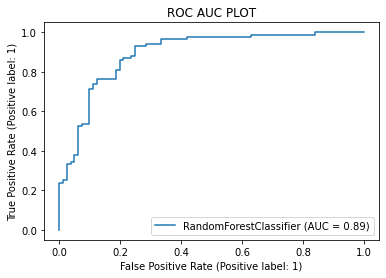

In [84]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

AUC score is 89%

In [85]:
original=np.array(y_test)
predicted=np.array(rfpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com

,Original,Predicted
0,1,1
1,1,1
2,0,1
3,1,1
4,1,0
...,...,...
160,0,0
161,1,1
162,1,1
163,1,1


# SAVING BEST MODEL

In [86]:
import joblib
joblib.dump(rf,'rffile.obj')

['rffile.obj']